<a href="https://colab.research.google.com/github/hallpaz/3dsystems23/blob/main/assignments/lab5_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3D Graphics Systems | AI Graphics - Theory and Practice | IMPA 2023
### Instructor: Luiz Velho
### TA: Hallison Paz
### Course info: https://lvelho.impa.br/i3d23/

## Lab Class #5 - Convolutional Neural Networks

**For this assignment, you must choose 1 from the following 2 activities proposed.**

### [Option 1] Convolutional Neural Networks for Analysis Tasks

In this practice, you'll train and evaluate a Convolutional Neural Network (CNN) on the Fashion-MNIST. This exercise serves as a smooth introduction to CNNs, so if you are not familiar with these architectures or does not have much time to dig deeper in this topic at this moment, this is the recommended track.

**[Fashion MNIST](https://en.wikipedia.org/wiki/Fashion_MNIST)** is a classic dataset containing 70,000 grayscale images of fashion products from 10 different categories, in the spirit of the original MNIST dataset. The dataset is divided as 60,000 training images and 10,000 for the test set.

This is one of the datasets that we can access though `torchvision.dataset`, which makes things easier to integrate in our PyTorch solution.  

**You should construct a neural network classifier that can predict the class of each product in the dataset.**


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import random_split, DataLoader

1. Create a train-test-val split. 
  * First check [here](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) to know how to get a train-test split. Then use `random_split` ([docs](https://pytorch.org/docs/stable/data.html?highlight=random_split#torch.utils.data.random_split)) to break your train set in a ratio [55000, 5000]. 
  * Create their respective loaders using `DataLoader`.

In [ ]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.2660,), (0.3530,)) 
                                 ])
#mnist_data = FashionMNIST(os.getcwd(), download=True, transform=mnist_transform)

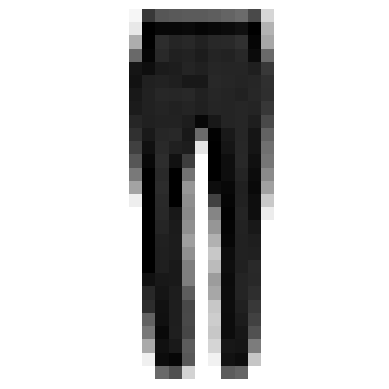

In [ ]:
image, label = mnist_data.__getitem__(2023)
plt.imshow(  image.view(28, 28).numpy(), cmap = 'gray_r' )
plt.axis('off')
plt.show()

2. Visualize and understand your data
  * Use the function `display_batch` (or create your own function) to visualize a batch of images in a organized manner.
  * Check the size of the datasets, as well as the shape of the images.
  * Check how balanced each dataset split is: You can use `torch.bincount` feature.

In [ ]:
def show(images, nrow=8):
  img_grid = torchvision.utils.make_grid(images, nrow=nrow).numpy()
  plt.figure()
  plt.imshow(np.transpose(img_grid, (1, 2, 0)), interpolation='gaussian')
  plt.axis('off')
  plt.show()

3. Design a Convolutional Neural Network model. 
  * You can use the base model below as your starting point. Experiment some different configurations, for example, making it deeperUsing `torch.nn` define a two layers feedforward neural network with a ReLU activation. The network must receive the image in its original shape, and reshape it in order to pass throught the linear layers.

In [ ]:
class FashionCNN(nn.Module):
    
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.fc1 = nn.Linear(in_features=16*13*13, out_features=10)
        
    def forward(self, x):
        out = self.conv1(x)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        
        return out

3. Using the `CrossEntropyLoss` loss function you must set an `optimizer` and train your network on the Fashion MNIST. You should set a print statement or a progress bar to print your training loss.

4. Test your model in your test dataset. Remember to use `torch.no_grad`.

5. Add a validation step in your training loop, saving your validation loss throughout the training. After the training plot the curve of the progress of this validation loss.

6. Try changing the learning rate, batch size, and other hyperparameters to observe how the test performance varies.

In [ ]:
from tqdm.notebook import tqdm
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [ ]:
# code here


7. **[EXTRA]** Add an accuracy measure in the validation loop. You might have to modify your model in order to get the logit values, then you can use `torch.argmax` to obtain the labels predicted, which you must them compare with the true labels. Plot the evolution of the accuracy.

9. **[EXTRA]** Plot the confusion matrix for your result model and evaluate the performance of your model. We suggest using [Seaborn](https://seaborn.pydata.org/). 


In [ ]:
# Code

---------
[Option 2] Full Convolutional Model to Depth Estimation 

This exercise relates images with 3D coordinates. The idea is to implement a simplified version of the paper [Depth Map Prediction from a Single Image using a Multi-Scale Deep Network](https://proceedings.neurips.cc/paper/2014/file/7bccfde7714a1ebadf06c5f4cea752c1-Paper.pdf). 

This task requires requires more effort to be completed, and will be graded more points for that. It's recommended for students who are already familiar with CNNs or that have time to spend in a extra challenge for higher rewards.

1. Donwload the NYU Depth Dataset v2 [at this link](https://cs.nyu.edu/~silberman/datasets/nyu_depth_v2.html).
  * The *Labeled* set has around 2.8 GB and should contain pre-processed depth maps, so we don't need to worry about missing values.
  * If you are using Google Colab to train your model, you probably want to save the dataset in your Google Drive account, so you don't have to upload it to the session environment every time you return to keep working on the assignment. 

2. Visualize a few examples of the data, specially check if the depth maps missing values were really pre-processed. If you think you might still have missing values, you will need to mask them out during training. 

3. Design a fully convolutional model to encode the RGB image and decode a depth map. The idea of this architecture is similar to the schematics below, but you may need to figure out a good model size.  

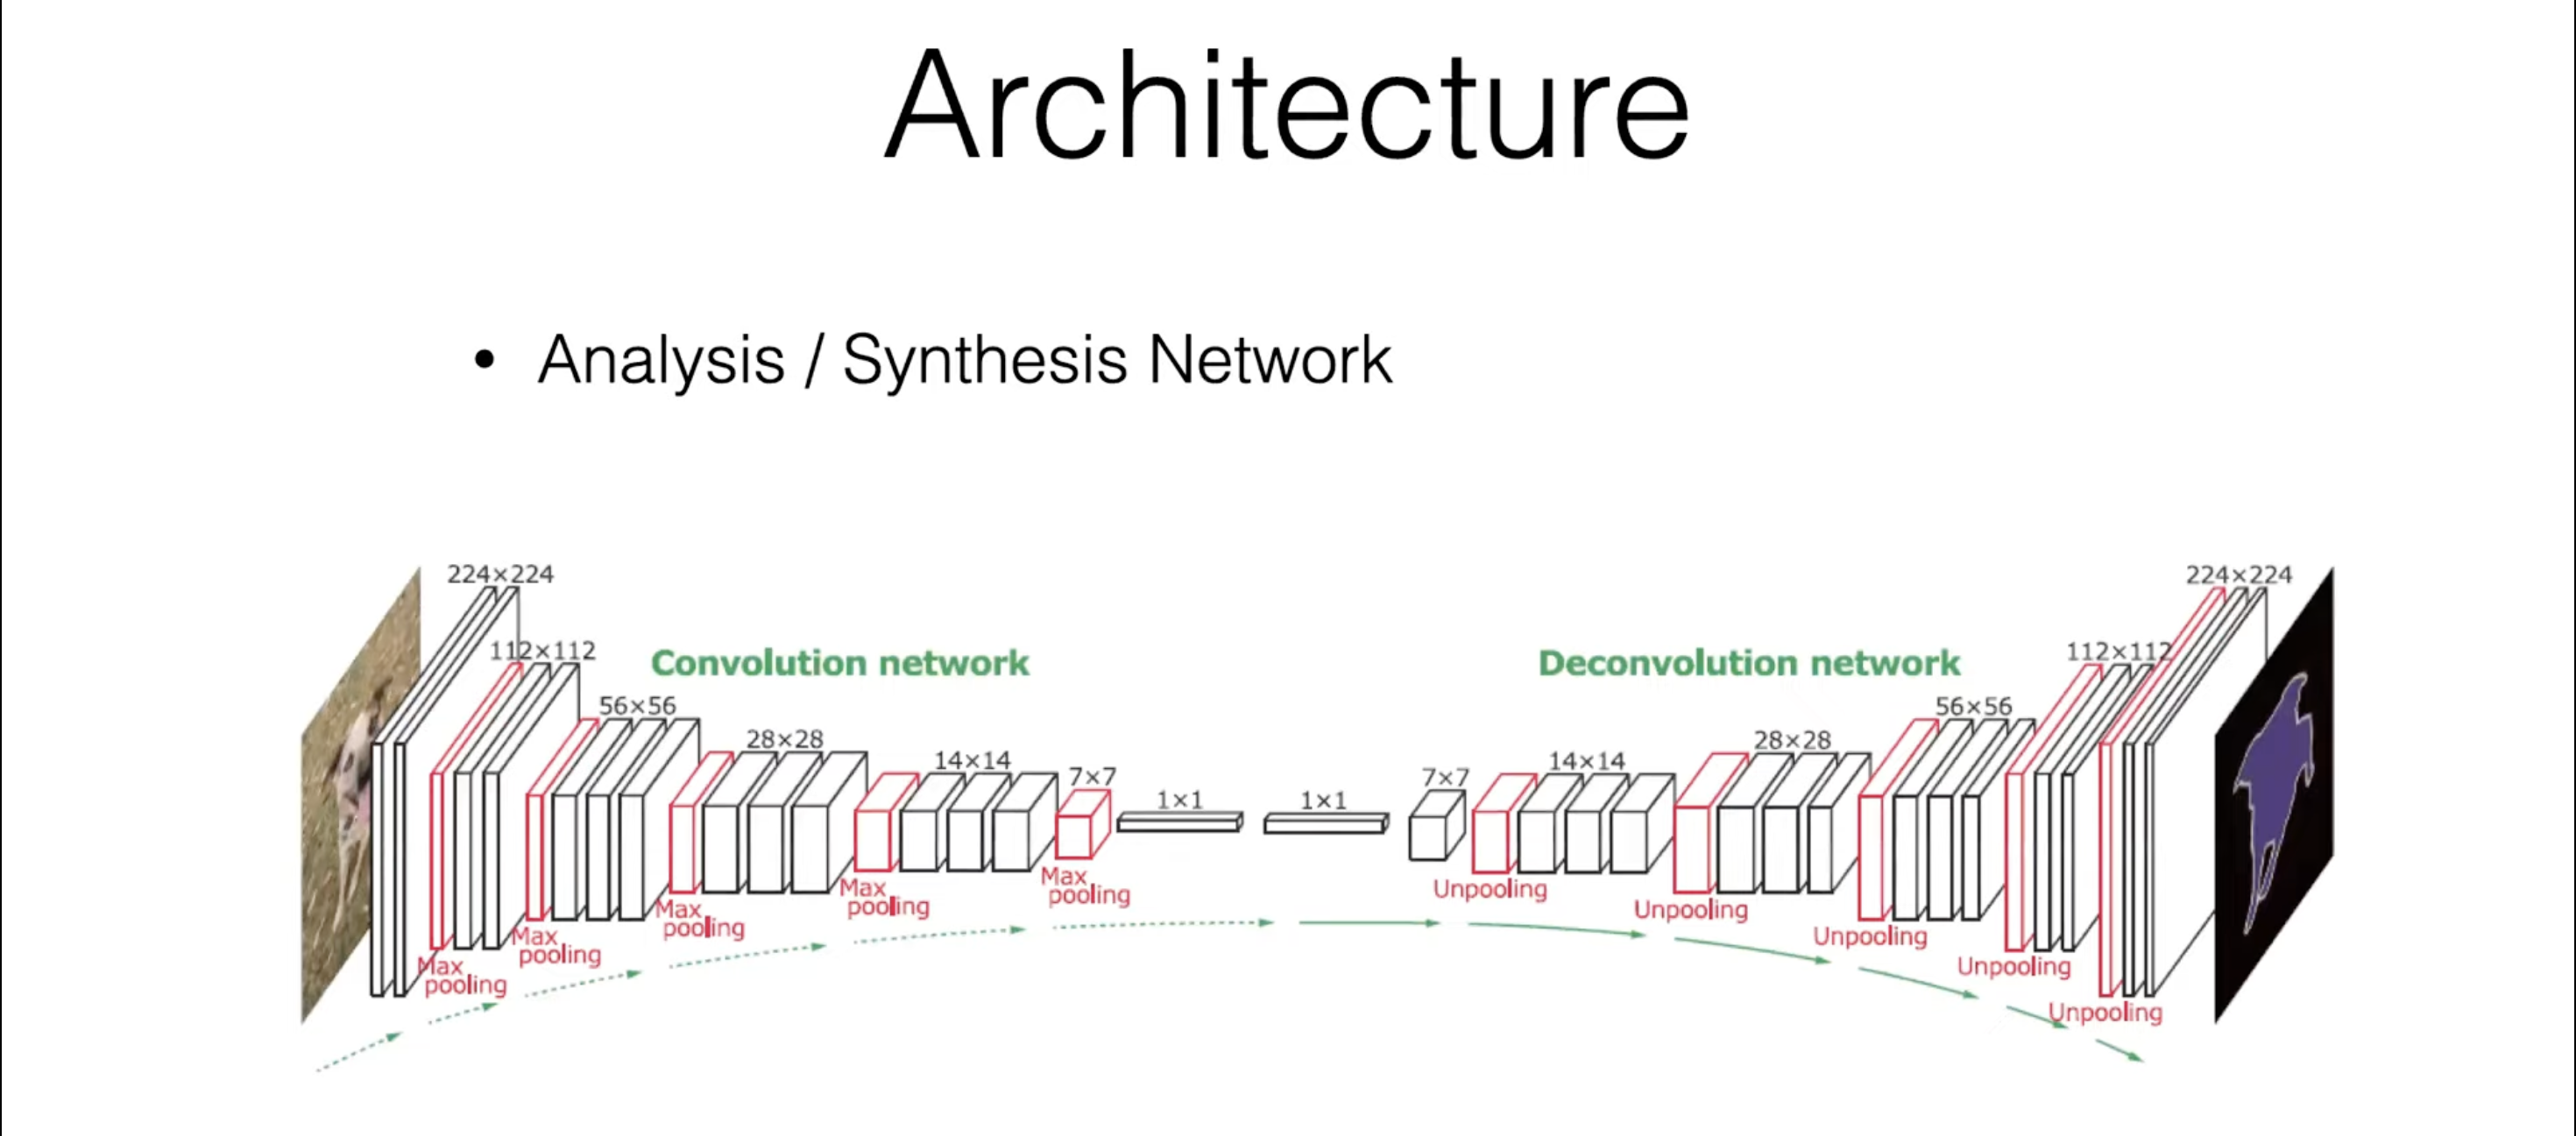

3. Train you model using the train data, and the scale-invariant loss function presented in the paper.

4. Evaluate your results.

**Obs:** We are not looking for the best possible results in this task. The purpose is to have an idea of you could implement your own solution following an approach like this one, that is general enough to be related to many other interesting problems in graphics. Feel free to adapt any step to simplify your work or try new ideas. For example, you may want to pre-process the RGB image to reduce its size or change its color space to work with a smaller model.

In [ ]:
# code here